# Veri Setini Yükleme

In [ ]:
import pandas as pd

# Veri seti ; ile ayrılmış bunu csv formatına uyacak şekilde "," formatında yazıyoruz
df = pd.read_csv("/content/data.csv", sep=';')

# Sütun adlarındaki fazla boşluk ve kaçış karakterlerini temizledik
df.columns = df.columns.str.replace('\t', '', regex=True).str.strip()

In [ ]:
df.head()
df.to_csv('students_data.csv', index=False)

In [ ]:
# Veri Setinde eksik veriler olup olmadığına bakıldı. Eksik Veri YOK.
df.isnull().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance,0
Previous qualification,0
Previous qualification (grade),0
Nacionality,0
Mother's qualification,0
Father's qualification,0


# Veri Ön İşleme Adımları

1- Target (yani sınıflandırma feature'mız) label encoder işlemi yapılacak

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Target sütunu kategorik etiket ise dönüştür
if df['Target'].dtype == 'object':
    encoder = LabelEncoder()
    df['Target'] = encoder.fit_transform(df['Target'])

In [ ]:
# Veri setindeki sınıflandırma dağılımı incelemesi
dropout=df[df["Target"]==0]
enrolled=df[df["Target"]==1]
graduate=df[df["Target"]==2]
print(len(dropout))
print(len(enrolled))
print(len(graduate))

1421
794
2209


In [ ]:
df.shape

(4424, 37)

In [ ]:
df.head()

,Application order,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),...,Debtor_0,Debtor_1,Tuition fees up to date_0,Tuition fees up to date_1,Gender_0,Gender_1,Scholarship holder_0,Scholarship holder_1,International_0,International_1
0,5,122.0,127.3,20,0,0,0,0,0.000000,0,...,1,0,0,1,0,1,1,0,1,0
1,1,160.0,142.5,19,0,6,6,6,14.000000,0,...,1,0,1,0,0,1,1,0,1,0
2,5,122.0,124.8,19,0,6,0,0,0.000000,0,...,1,0,1,0,0,1,1,0,1,0
3,2,122.0,119.6,20,0,6,8,6,13.428571,0,...,1,0,0,1,1,0,1,0,1,0
4,1,100.0,141.5,45,0,6,9,5,12.333333,0,...,1,0,0,1,1,0,1,0,1,0


2- Ölçeklenmesi gereken columlar'ı belirleme ve StandartScaler yapma işlemi

In [ ]:
from sklearn.preprocessing import StandardScaler
# Ölçeklenmesi gereken sutunlar
columns_to_scale = [
    "Application order",
    "Previous qualification (grade)",
    "Admission grade",
    "Age at enrollment",
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)",
    "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (credited)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (grade)",
    "Curricular units 2nd sem (without evaluations)",
    "Unemployment rate",
    "Inflation rate",
    "GDP"
]
ss = StandardScaler()
# Seçilen sütunları standardize etme
df[columns_to_scale] = ss.fit_transform(df[columns_to_scale])

In [ ]:
df.dtypes.value_counts() # Tüm değerler makinenin anlayacağı formatta mı? (Sayısal mı) EVET

,count
float64,19
int64,18


In [ ]:
df.to_csv('En_guncel_ogrenci_data.csv', index=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   float64
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

# Features Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

# numerik değerleri seçerken features selection

X_float = df.select_dtypes(include=['float64'])
y = df['Target']

selector = SelectKBest(score_func=f_classif, k=10)  # k en iyi özelliği alır
X_new = selector.fit_transform(X_float, y)

selected_features = X_float.columns[selector.get_support()]

# chi kare ile features selection
# Kategorik değerleri seçerken Features selection

X_bin = df.select_dtypes(include=['int64']).drop(columns=['Target'])  # Target dışla
selector = SelectKBest(score_func=chi2, k=10)
X_bin_selected = selector.fit_transform(X_bin, y)

selected_bin_features = X_bin.columns[selector.get_support()]

In [ ]:
# Selection Features'ları birleştirir.
X_selected = pd.concat([X_float[selected_features], X_bin[selected_bin_features]], axis=1)

X = X_selected

# Model Eğitimi

1- Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Veriyi ayır
#X = df.drop("Target", axis=1)
y = df["Target"]

# Eğitim ve test verisini ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


# Modeli eğit
model = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=100,      # Ağaç sayısı
    criterion='gini',      # veya 'entropy' (sınıflandırma için)
    #max_depth=None,        # Ağaçların maksimum derinliği
    #min_samples_split=2,   # Bölünme için minimum örnek sayısı
    #min_samples_leaf=1,    # Yaprak düğümler için minimum örnek sayısı
    #max_features='auto',   # Her bölünmede düşünülecek özellik sayısı ('sqrt' genelde iyidir)
    #bootstrap=True,        # Örneklerin bootstrap ile seçilip seçilmeyeceği
    random_state=42        # Reprodüksiyon için
)
model.fit(X_train, y_train)

# Tahmin ve değerlendirme
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.75      0.78       284
           1       0.54      0.40      0.46       159
           2       0.80      0.92      0.86       442

    accuracy                           0.77       885
   macro avg       0.72      0.69      0.70       885
weighted avg       0.76      0.77      0.76       885



In [ ]:
from imblearn.over_sampling import SMOTE

# Eğitim/test verilerini ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# SMOTE ile eğitim verisini dengele
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Random Forest sınıflandırıcısını oluştur ve eğit
model = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=100,
    criterion='gini',
    random_state=42
)
model.fit(X_train_smote, y_train_smote)

# Test verisi üzerinde tahmin yap
y_pred = model.predict(X_test)

# Performans raporu
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.70      0.76       284
           1       0.45      0.48      0.47       159
           2       0.81      0.88      0.84       442

    accuracy                           0.75       885
   macro avg       0.70      0.69      0.69       885
weighted avg       0.75      0.75      0.75       885



In [ ]:
# RandomForest algoritmasını yorumluyacak olursak "1" sınıfının tahmini için inanılmaz kötü bir şekilde tahmin etti.
# Bu zaten bizim öngördüğümüz bir şeydi.
# Çünkü veri seti dengesizdi. örneklemleri birbirine eşitleyip tekrardan deneyecem
# Dengesiz veri setlerinde çalışma yönü bakımında XGBOOST algoritması güzel bir performans veriyor bir de onunla deneyelim.

2- XGBOST

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#X = df.drop("Target", axis=1)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)

# Modeli eğit
xgb_model.fit(X_train, y_train)

# Tahmin yap
y_pred = xgb_model.predict(X_test)

# Performans raporunu yazdır
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78       316
           1       0.45      0.34      0.39       151
           2       0.78      0.91      0.84       418

    accuracy                           0.75       885
   macro avg       0.69      0.66      0.67       885
weighted avg       0.74      0.75      0.74       885



In [ ]:
# XGBoost algoritması ile de "1" sınıfının yani verinin 1 ile etiketlenmiş olan en az sınıfın yine sorunlu olduğu görüldü.
# Artık dengesiz veri seti ile çalışmanın bir fayda getirmeyeceği XGBoost algoritması denendikten sonra da tekrardan görülmüş oldu.

Lineer Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

# Train-test bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Modeli oluştur ve eğit
log_model = LogisticRegression(max_iter=1000,class_weight='balanced')
log_model.fit(X_res, y_res)

# Tahmin ve değerlendirme
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Sonuçları:")
print(classification_report(y_test, y_pred_log))

Logistic Regression Sonuçları:
              precision    recall  f1-score   support

           0       0.82      0.57      0.67       316
           1       0.33      0.51      0.40       151
           2       0.76      0.78      0.77       418

    accuracy                           0.66       885
   macro avg       0.63      0.62      0.61       885
weighted avg       0.70      0.66      0.67       885



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Destek Vektör Makinesi

In [ ]:
pip install lightgbm

In [ ]:
import lightgbm as lgb

# Modeli tanımla
lgb_model = lgb.LGBMClassifier(random_state=42)

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Eğit
lgb_model.fit(X_res, y_res)

# Tahmin yap
y_pred = lgb_model.predict(X_test)

# Performans raporu
print("LightGBM Sınıflandırma Sonuçları:")
print(classification_report(y_test, y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2798
[LightGBM] [Info] Number of data points in the train set: 6627, number of used features: 20
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
LightGBM Sınıflandırma Sonuçları:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       316
           1       0.93      0.85      0.89       151
           2       0.92      0.98      0.95       418

    accuracy                           0.94       885
   macro avg       0.94      0.92      0.93       885
weighted avg       0.94      0.94      0.94   

# Analiz

LGBMClassifier

In [ ]:
# Ezber yapmış mı kontrol et.

from sklearn.metrics import f1_score

# Eğitilmiş model üzerinden tahminler
y_train_pred = lgb_model.predict(X_res)
y_test_pred = lgb_model.predict(X_test)

# Eğitim ve test F1 skorları (macro)
train_f1 = f1_score(y_res, y_train_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')

print(f"Eğitim F1 (macro): {train_f1:.4f}")
print(f"Test F1 (macro): {test_f1:.4f}")

Eğitim F1 (macro): 0.9576
Test F1 (macro): 0.9305


<Axes: >

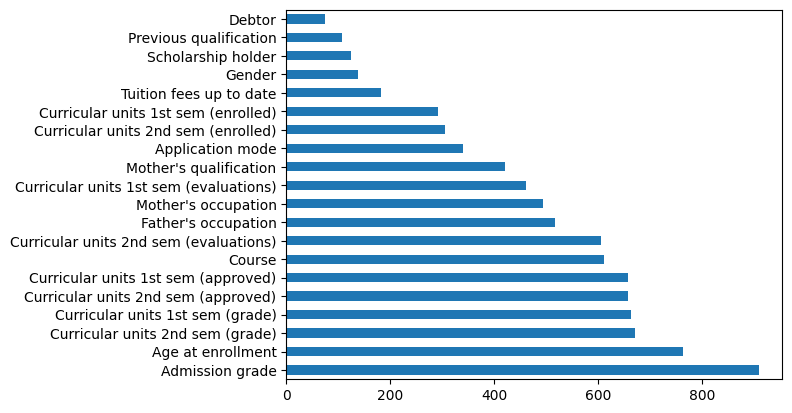

In [ ]:
# Hangi Features'lar ne kadar önem sağladı.
feature_importances = pd.Series(lgb_model.feature_importances_, index=X.columns)
feature_importances.nlargest(20).plot(kind='barh')

In [ ]:
# Cross Validation ile genelleme yeteneği hesaplama.
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lgb_model, X, y, cv=5, scoring='f1_macro')
print(f"Mean F1 (macro): {scores.mean():.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 3539, number of used features: 20
[LightGBM] [Info] Start training from score -1.136331
[LightGBM] [Info] Start training from score -1.717974
[LightGBM] [Info] Start training from score -0.693995
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000663 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1073
[LightGBM] [Info] Number of data points in the train set: 3539, nu